In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pickle

# Steps

1. Read the dataset
2. Split the dataset into train and validation sets, 80:20 ratio.
3. Further split train dataset into train and test sets, 90:10.

In [2]:
#Read the data from the csv file

main_data = pd.read_csv(r"F:/Machine Learning/healthcare/healthcare_stroke_dataset.csv")

In [3]:
#Verify if the data is correct
#Check the data dimensions

print(main_data.shape)
main_data.head()
main_data.info()

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
main_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
median_value = main_data['bmi'].median()
main_data['bmi'].fillna(median_value,inplace = True)

In [6]:
#EDA
main_data.info()
main_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#id column will be discarded
#sns.catplot(x = 'gender',hue = "stroke", kind= "count", data= main_data)

#there is one row with gender = 'other', so we will delete this row
main_data.iloc[3116]

id                             56156
gender                         Other
age                               26
hypertension                       0
heart_disease                      0
ever_married                      No
work_type                    Private
Residence_type                 Rural
avg_glucose_level             143.33
bmi                             22.4
smoking_status       formerly smoked
stroke                             0
Name: 3116, dtype: object

In [8]:
main_data.drop(labels = [3116],axis = 0,inplace = True)

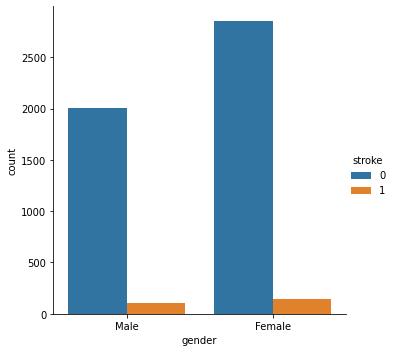

In [9]:
sns.catplot(x ="gender", hue = 'stroke', kind = 'count',data = main_data)
#gender = Female is more than gender = Male but not much difference is observed in stroke

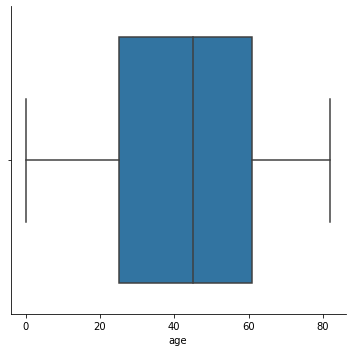

In [10]:
sns.catplot(x = 'age', kind = 'box', data = main_data)

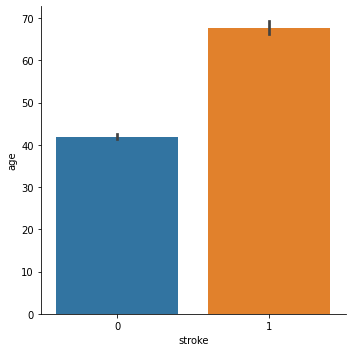

In [11]:
sns.catplot(x='stroke', y = 'age',kind = 'bar',data = main_data)
#higher the age, higher the probability of stroke

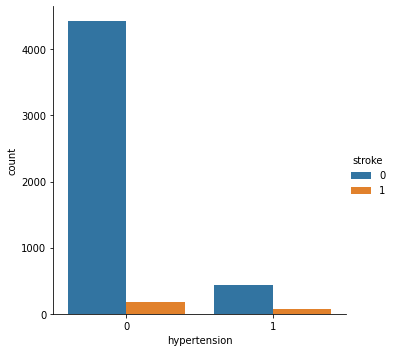

In [12]:
sns.catplot(x ="hypertension", hue = 'stroke', kind = 'count',data = main_data)

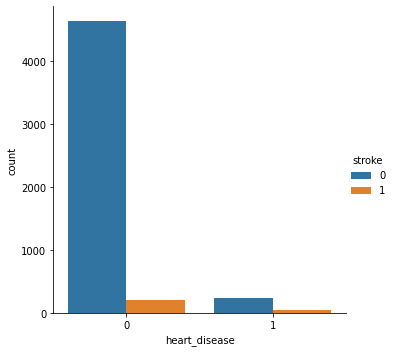

In [13]:
sns.catplot(x ="heart_disease", hue = 'stroke', kind = 'count',data = main_data)

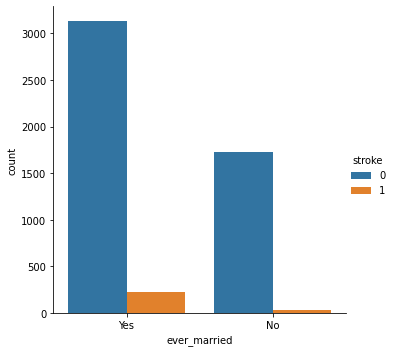

In [14]:
sns.catplot(x ="ever_married", hue = 'stroke', kind = 'count',data = main_data)
#ever_married affects chances of stroke 

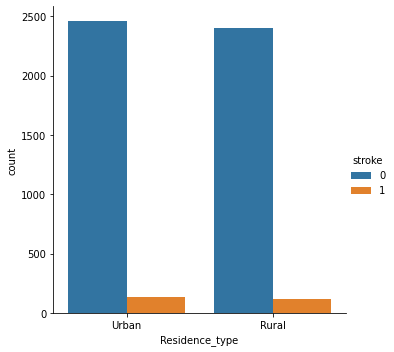

In [15]:
sns.catplot(x ="Residence_type", hue = 'stroke', kind = 'count',data = main_data)

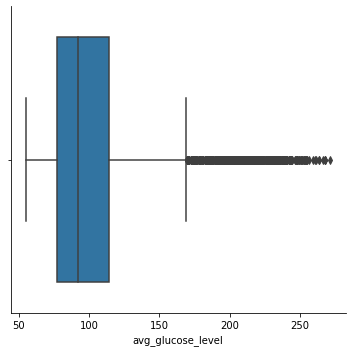

In [16]:
sns.catplot(x ="avg_glucose_level",kind = 'box',data = main_data)
#There seems to be many outliers

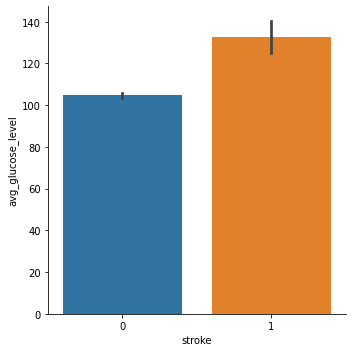

In [17]:
sns.catplot(x = 'stroke',y = 'avg_glucose_level',kind = 'bar',data = main_data)

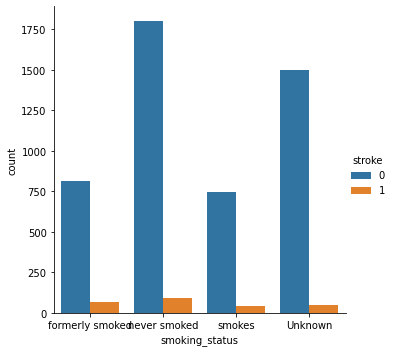

In [18]:
sns.catplot(x ="smoking_status", hue = 'stroke', kind = 'count',data = main_data)

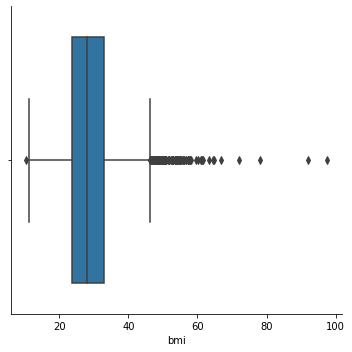

In [19]:
sns.catplot(x= 'bmi',kind= 'box',data = main_data)

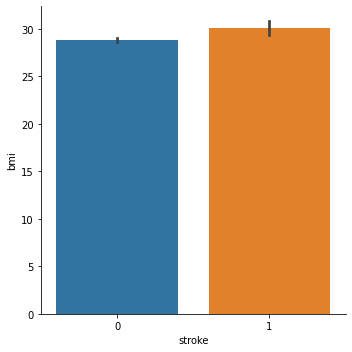

In [20]:
sns.catplot(x = 'stroke',y = 'bmi',kind = 'bar',data = main_data)

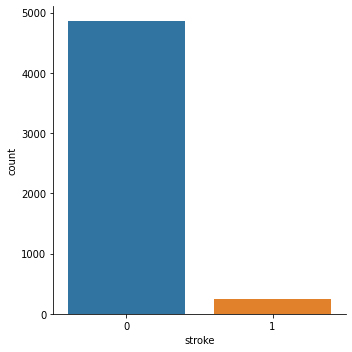

In [21]:
sns.catplot(x = 'stroke',kind = 'count',data = main_data)
#This is an imbalanced data set

We will now split the dataset and check correlation, feature_importance and feature_selection

In [22]:
#Assign the independent values to X and dependent value to y

main_X = main_data.iloc[:,:-1]
print(main_X.shape)

main_Y = main_data.iloc[:,-1]
print(main_Y.shape)

(5109, 11)
(5109,)


In [23]:
#Split the data as per requirement

x1_train, x1_test, y1_train, y1_test = train_test_split(main_X, main_Y, train_size = 0.8, random_state = 5)

In [24]:
#Check if the split is as required

print(x1_train.shape)
print(x1_test.shape)

(4087, 11)
(1022, 11)


In [25]:
#Combine x_test and y_test columns and keep this dataset aside for final validation of the model
#Convert x_test and y_test into dataframes

x1_test = pd.DataFrame(x1_test)
y1_test = pd.DataFrame(y1_test)

validation_set = pd.concat([x1_test, y1_test],axis=1,ignore_index = True)

#assign column names
validation_set.columns = ['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',
                          'avg_glucose_level','bmi','smoking_status','stroke']

validation_set.shape
validation_set.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1302,56090,Female,65.0,0,0,Yes,Self-employed,Rural,167.31,27.1,never smoked,0
3632,61333,Female,78.0,0,0,No,Self-employed,Rural,68.35,31.4,Unknown,0
4862,49451,Female,53.0,0,0,Yes,Private,Rural,83.91,36.6,Unknown,0
3550,52216,Female,35.0,0,0,Yes,Private,Urban,87.72,21.3,never smoked,0
3608,70022,Male,32.0,0,0,No,Private,Rural,61.11,32.7,never smoked,0


In [26]:
#Further split the train into train and test datasets
x2_train,x2_test,y2_train,y2_test = train_test_split(x1_train,y1_train,train_size = 0.9,random_state = 7)

In [27]:
x2_train = pd.DataFrame(x2_train)
x2_test = pd.DataFrame(x2_test)
y2_train = pd.DataFrame(y2_train)
y2_test = pd.DataFrame(y2_test)

train_data = pd.concat([x2_train,y2_train],axis = 1,ignore_index = True)
test_data = pd.concat([x2_test,y2_test],axis = 1,ignore_index = True)

#assign column names to train and test dataset
train_data.columns =  ['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',
                          'avg_glucose_level','bmi','smoking_status','stroke']

#assign column names
test_data.columns =  ['id','gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type',
                          'avg_glucose_level','bmi','smoking_status','stroke']

print(train_data.shape)
print(test_data.shape)

(3678, 12)
(409, 12)


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 3226 to 4855
Data columns (total 12 columns):
id                   3678 non-null int64
gender               3678 non-null object
age                  3678 non-null float64
hypertension         3678 non-null int64
heart_disease        3678 non-null int64
ever_married         3678 non-null object
work_type            3678 non-null object
Residence_type       3678 non-null object
avg_glucose_level    3678 non-null float64
bmi                  3678 non-null float64
smoking_status       3678 non-null object
stroke               3678 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 373.5+ KB


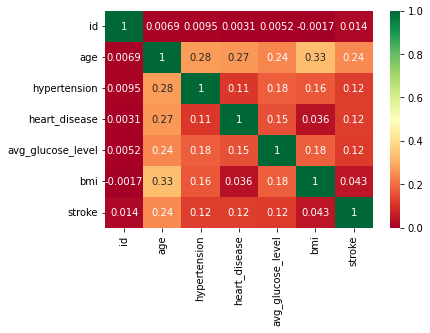

In [29]:
#to plot the correlation heatmap

sns.heatmap(train_data.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

In [30]:
#Perform OneHotEncoding on Nominal Categorical Data

Gender = train_data[["gender"]]

Gender = pd.get_dummies(Gender, drop_first= False)

Gender.head()

,gender_Female,gender_Male
3226,1,0
1174,1,0
2795,0,1
2876,1,0
4587,0,1


In [31]:
#Perform OneHotEncoding on Nominal Categorical Data

Ever_married = train_data[["ever_married"]]

Ever_married = pd.get_dummies(Ever_married, drop_first= False)

Ever_married.head()

,ever_married_No,ever_married_Yes
3226,1,0
1174,1,0
2795,0,1
2876,0,1
4587,1,0


In [32]:
#Perform OneHotEncoding on Nominal Categorical Data

Work_type = train_data[["work_type"]]

Work_type = pd.get_dummies(Work_type, drop_first= False)

Work_type.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
3226,0,0,0,0,1
1174,0,0,0,0,1
2795,0,0,1,0,0
2876,0,0,0,1,0
4587,0,0,0,0,1


In [33]:
#Perform OneHotEncoding on Nominal Categorical Data

residence_type = train_data[["Residence_type"]]

residence_type = pd.get_dummies(residence_type, drop_first= False)

residence_type.head()

,Residence_type_Rural,Residence_type_Urban
3226,0,1
1174,1,0
2795,1,0
2876,0,1
4587,0,1


In [34]:
#Perform OneHotEncoding on Nominal Categorical Data

Smoking_status = train_data[["smoking_status"]]

Smoking_status = pd.get_dummies(Smoking_status, drop_first= False)

Smoking_status.head()

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3226,1,0,0,0
1174,1,0,0,0
2795,0,0,1,0
2876,0,1,0,0
4587,1,0,0,0


In [35]:
#Drop the old columns and append the OneHotEncoded columns

train_data.drop(["gender","ever_married","work_type","Residence_type","smoking_status"], axis=1,inplace=True)
train_data.shape

(3678, 7)

In [36]:
#Add new OneHotEncoded columns

train_data = pd.concat([train_data[['id','age','hypertension','heart_disease','avg_glucose_level','bmi']],
                                    Gender,Ever_married,residence_type,Smoking_status,Work_type,train_data[['stroke']]], axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 3226 to 4855
Data columns (total 22 columns):
id                                3678 non-null int64
age                               3678 non-null float64
hypertension                      3678 non-null int64
heart_disease                     3678 non-null int64
avg_glucose_level                 3678 non-null float64
bmi                               3678 non-null float64
gender_Female                     3678 non-null uint8
gender_Male                       3678 non-null uint8
ever_married_No                   3678 non-null uint8
ever_married_Yes                  3678 non-null uint8
Residence_type_Rural              3678 non-null uint8
Residence_type_Urban              3678 non-null uint8
smoking_status_Unknown            3678 non-null uint8
smoking_status_formerly smoked    3678 non-null uint8
smoking_status_never smoked       3678 non-null uint8
smoking_status_smokes             3678 non-null uint8
work_type_Govt_job  

In [37]:
X_train= train_data.iloc[:,1:21]
y_train = train_data.iloc[:,21]

In [38]:
# Feature importance using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
feat_imp = ExtraTreesRegressor()
feat_imp.fit(X_train, y_train)

C:\Users\sam1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [39]:
print(feat_imp.feature_importances_)

[0.23467182 0.02753592 0.02577391 0.21374338 0.19281579 0.02694407
 0.02757219 0.0149446  0.0109631  0.02648233 0.03027012 0.02844509
 0.02564452 0.02758354 0.02138081 0.01647381 0.         0.02392104
 0.0245121  0.00032184]


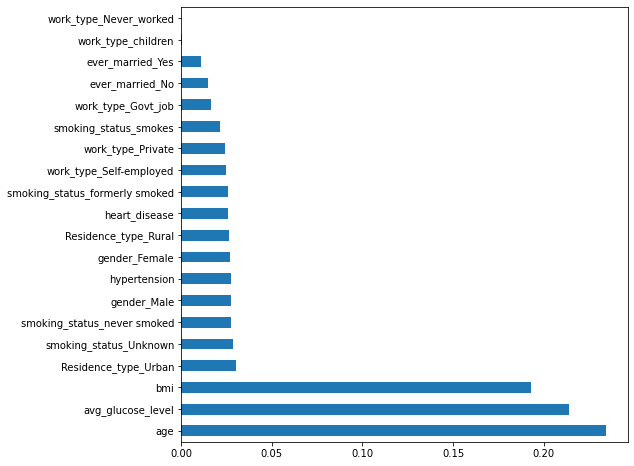

In [40]:
#feature importance graph

plt.figure(figsize = (8,8))
featimp = pd.Series(feat_imp.feature_importances_, index=X_train.columns)
featimp.nlargest(20).plot(kind='barh')
plt.show()

# Perform pre-processing steps on test data

In [41]:
#Perform OneHotEncoding on Nominal Categorical Data

Gender_test = test_data[["gender"]]

Gender_test = pd.get_dummies(Gender_test, drop_first= False)

Gender_test.head()

,gender_Female,gender_Male
1516,0,1
2368,1,0
4997,1,0
32,1,0
1003,1,0


In [42]:
#Perform OneHotEncoding on Nominal Categorical Data

Ever_married_test = test_data[["ever_married"]]

Ever_married_test = pd.get_dummies(Ever_married_test, drop_first= False)

Ever_married_test.head()

,ever_married_No,ever_married_Yes
1516,0,1
2368,1,0
4997,1,0
32,0,1
1003,0,1


In [43]:
#Perform OneHotEncoding on Nominal Categorical Data

Work_type_test = test_data[["work_type"]]

Work_type_test = pd.get_dummies(Work_type_test, drop_first= False)

Work_type_test.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1516,0,0,0,1,0
2368,0,0,1,0,0
4997,0,0,0,0,1
32,0,0,0,1,0
1003,0,0,1,0,0


In [44]:
#Perform OneHotEncoding on Nominal Categorical Data

residence_type_test = test_data[["Residence_type"]]

residence_type_test = pd.get_dummies(residence_type_test, drop_first= False)

residence_type_test.head()

,Residence_type_Rural,Residence_type_Urban
1516,0,1
2368,1,0
4997,0,1
32,0,1
1003,0,1


In [45]:
#Perform OneHotEncoding on Nominal Categorical Data

Smoking_status_test = test_data[["smoking_status"]]

Smoking_status_test = pd.get_dummies(Smoking_status_test, drop_first= False)

Smoking_status_test.head()

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1516,0,0,1,0
2368,1,0,0,0
4997,1,0,0,0
32,0,0,1,0
1003,0,0,1,0


In [46]:
#Drop the old columns and append the OneHotEncoded columtestns

test_data.drop(["gender","ever_married","work_type","Residence_type","smoking_status"], axis=1,inplace=True)
test_data.shape

(409, 7)

In [47]:
#Add new OneHotEncoded columns

test_data = pd.concat([train_data[['id','age','hypertension','heart_disease','avg_glucose_level','bmi']],
                                    Gender,Ever_married,residence_type,Smoking_status,Work_type,train_data[['stroke']]], axis=1)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 3226 to 4855
Data columns (total 22 columns):
id                                3678 non-null int64
age                               3678 non-null float64
hypertension                      3678 non-null int64
heart_disease                     3678 non-null int64
avg_glucose_level                 3678 non-null float64
bmi                               3678 non-null float64
gender_Female                     3678 non-null uint8
gender_Male                       3678 non-null uint8
ever_married_No                   3678 non-null uint8
ever_married_Yes                  3678 non-null uint8
Residence_type_Rural              3678 non-null uint8
Residence_type_Urban              3678 non-null uint8
smoking_status_Unknown            3678 non-null uint8
smoking_status_formerly smoked    3678 non-null uint8
smoking_status_never smoked       3678 non-null uint8
smoking_status_smokes             3678 non-null uint8
work_type_Govt_job  

In [48]:
X_test = test_data.iloc[:,1:21]
y_test = test_data.iloc[:,21]

In [49]:
#try to fit using svc

model_svc = svm.SVC(kernel = 'linear')
model_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
svc_pred = model_svc.predict(X_test)

In [51]:
print("Accuracy:",accuracy_score(y_test, svc_pred))

Accuracy: 0.9510603588907015


In [52]:
#try to fit using random forest

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
rf_pred=model_rf.predict(X_test)

In [54]:
print("Accuracy:",accuracy_score(y_test, rf_pred))

Accuracy: 1.0


# check on validation set

In [55]:
#Perform OneHotEncoding on Nominal Categorical Data

Gender_val = validation_set[["gender"]]

Gender_val = pd.get_dummies(Gender_val, drop_first= False)

Gender_val.head()

,gender_Female,gender_Male
1302,1,0
3632,1,0
4862,1,0
3550,1,0
3608,0,1


In [56]:
#Perform OneHotEncoding on Nominal Categorical Data

Ever_married_val = validation_set[["ever_married"]]

Ever_married_val = pd.get_dummies(Ever_married_val, drop_first= False)

Ever_married_val.head()

,ever_married_No,ever_married_Yes
1302,0,1
3632,1,0
4862,0,1
3550,0,1
3608,1,0


In [57]:
#Perform OneHotEncoding on Nominal Categorical Data

Work_type_val = validation_set[["work_type"]]

Work_type_val = pd.get_dummies(Work_type_val, drop_first= False)

Work_type_val.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1302,0,0,0,1,0
3632,0,0,0,1,0
4862,0,0,1,0,0
3550,0,0,1,0,0
3608,0,0,1,0,0


In [58]:
#Perform OneHotEncoding on Nominal Categorical Data

residence_type_val = validation_set[["Residence_type"]]

residence_type_val = pd.get_dummies(residence_type_val, drop_first= False)

residence_type_val.head()

,Residence_type_Rural,Residence_type_Urban
1302,1,0
3632,1,0
4862,1,0
3550,0,1
3608,1,0


In [59]:
#Perform OneHotEncoding on Nominal Categorical Data

Smoking_status_val = validation_set[["smoking_status"]]

Smoking_status_val = pd.get_dummies(Smoking_status_val, drop_first= False)

Smoking_status_val.head()

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1302,0,0,1,0
3632,1,0,0,0
4862,1,0,0,0
3550,0,0,1,0
3608,0,0,1,0


In [60]:
#Drop the old columns and append the OneHotEncoded columns

validation_set.drop(["gender","ever_married","work_type","Residence_type","smoking_status"], axis=1,inplace=True)
validation_set.shape

(1022, 7)

In [61]:
#Add new OneHotEncoded columns

validation_set = pd.concat([train_data[['id','age','hypertension','heart_disease','avg_glucose_level','bmi']],
                                    Gender,Ever_married,residence_type,Smoking_status,Work_type,train_data[['stroke']]], axis=1)

validation_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 3226 to 4855
Data columns (total 22 columns):
id                                3678 non-null int64
age                               3678 non-null float64
hypertension                      3678 non-null int64
heart_disease                     3678 non-null int64
avg_glucose_level                 3678 non-null float64
bmi                               3678 non-null float64
gender_Female                     3678 non-null uint8
gender_Male                       3678 non-null uint8
ever_married_No                   3678 non-null uint8
ever_married_Yes                  3678 non-null uint8
Residence_type_Rural              3678 non-null uint8
Residence_type_Urban              3678 non-null uint8
smoking_status_Unknown            3678 non-null uint8
smoking_status_formerly smoked    3678 non-null uint8
smoking_status_never smoked       3678 non-null uint8
smoking_status_smokes             3678 non-null uint8
work_type_Govt_job  

In [62]:
X_val= validation_set.iloc[:,1:21]
y_val = validation_set.iloc[:,21]

In [63]:
svc_pred_val = model_svc.predict(X_val)

In [64]:
print("Accuracy:",accuracy_score(y_val, svc_pred_val))

Accuracy: 0.9510603588907015


In [65]:
rf_pred_val = model_rf.predict(X_val)

In [66]:
print("Accuracy:",accuracy_score(y_val, rf_pred_val))

Accuracy: 1.0


# save and load into pickle file

In [67]:
##dump the model into a file
file = open('stroke.pkl','wb')
pickle.dump(model_rf,file) 

In [68]:
model = pickle.load(open('stroke.pkl','rb'))